# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [55]:
# Import library untuk manipulasi data
import pandas as pd
import numpy as np

# Import library untuk visualisasi (opsional)
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk preprocessing dan pembagian dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import library untuk model klasifikasi
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import library untuk evaluasi model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import library untuk hyperparameter tuning (jika diperlukan)
from sklearn.model_selection import GridSearchCV

# Import library untuk menyimpan model
import joblib

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [56]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]

# Membaca dataset hasil interpretasi clustering
df = pd.read_csv("data_clustering_inverse.csv")

In [57]:
# Cek informasi umum dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2515 non-null   float64
 1   CustomerAge              2515 non-null   float64
 2   TransactionDuration      2515 non-null   float64
 3   LoginAttempts            2515 non-null   float64
 4   AccountBalance           2515 non-null   float64
 5   Target                   2515 non-null   int64  
 6   TransactionDate          2487 non-null   object 
 7   TransactionType          2485 non-null   object 
 8   Location                 2485 non-null   object 
 9   Channel                  2488 non-null   object 
 10  CustomerOccupation       2492 non-null   object 
 11  PreviousTransactionDate  2491 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 235.9+ KB
None


In [58]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Target,TransactionDate,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate
0,14.09,70.000000,81.0,1.0,5112.21,0,2023-04-11 16:29:14,Debit,San Diego,ATM,Doctor,2024-11-04 08:08:08
1,376.24,68.000000,141.0,1.0,13758.91,2,2023-06-27 16:44:19,Debit,Houston,ATM,Doctor,2024-11-04 08:09:35
2,126.29,19.000000,56.0,1.0,1122.35,2,2023-07-10 18:16:08,Debit,Mesa,Online,Student,2024-11-04 08:07:04
3,184.50,26.000000,25.0,1.0,8569.06,0,2023-05-05 16:32:11,Debit,Raleigh,Online,Student,2024-11-04 08:09:06
4,13.45,44.644916,198.0,1.0,7429.40,1,2023-10-16 17:51:24,Credit,Atlanta,Online,Student,2024-11-04 08:06:39


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [59]:
# 1. Hapus kolom waktu
df = df.drop(columns=['TransactionDate', 'PreviousTransactionDate'])

# 2. Encoding kolom kategorikal
df_encoded = pd.get_dummies(df, columns=['TransactionType', 'Location', 'Channel', 'CustomerOccupation'])

# 3. Ubah nama kolom 'Target' menjadi 'cluster_label'
df_encoded.rename(columns={'Target': 'cluster_label'}, inplace=True)

# 4. Pisahkan fitur dan target
X = df_encoded.drop(columns=['cluster_label'])
y = df_encoded['cluster_label']

In [60]:
# Membagi data menjadi training dan testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,         # 20% data untuk test, 80% data untuk training
    random_state=42,       
    stratify=y             
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 2012
Test size: 503


*Insight Data Splitting :*
- Dataset total berjumlah 2515 data.
- Data terbagi menjadi:
    - Training set: 2012 data (80%)
    - Testing set: 503 data (20%)

# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

Akurasi: 0.3658051689860835

Laporan klasifikasi:
               precision    recall  f1-score   support

           0       0.38      0.34      0.36       171
           1       0.38      0.38      0.38       166
           2       0.34      0.38      0.36       166

    accuracy                           0.37       503
   macro avg       0.37      0.37      0.37       503
weighted avg       0.37      0.37      0.37       503



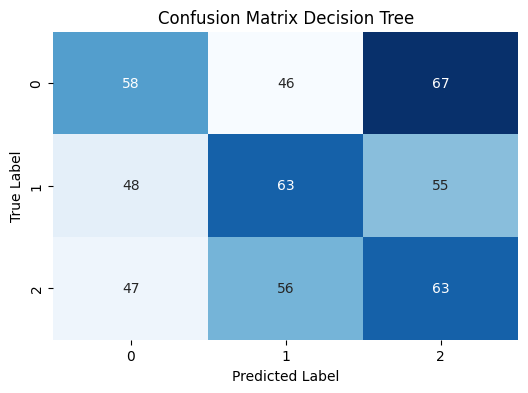

In [61]:
# 6. Latih model Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan klasifikasi:\n", classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Decision Tree')
plt.show()


*Insight Model Decision Tree :*
- Akurasi Model
    - Model Decision Tree menghasilkan akurasi sekitar 36.6% pada data pengujian. 

- Performa Klasifikasi per Kelas
    - Precision dan recall untuk ketiga kelas (0, 1, 2) berada di kisaran 0.34 hingga 0.38.
    - Nilai F1-score yang juga sekitar 0.36 - 0.38 mengindikasikan keseimbangan yang rendah antara presisi dan recall.

- Confusion Matrix
    - Dari heatmap confusion matrix terlihat bahwa model sering melakukan prediksi salah (banyak nilai diagonal utama yang rendah dan distribusi prediksi menyebar ke kelas lain).

In [62]:
# Menyimpan Model
# import joblib
# joblib.dump(model, 'decision_tree_model.h5')

import joblib

# Simpan model Decision Tree ke file
joblib.dump(dt_model, 'decision_tree_model.h5')


['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

**Melatih model menggunakan Random Forest*

Akurasi Random Forest: 0.32803180914512925

Laporan klasifikasi:
               precision    recall  f1-score   support

           0       0.30      0.32      0.31       171
           1       0.34      0.33      0.33       166
           2       0.35      0.34      0.35       166

    accuracy                           0.33       503
   macro avg       0.33      0.33      0.33       503
weighted avg       0.33      0.33      0.33       503



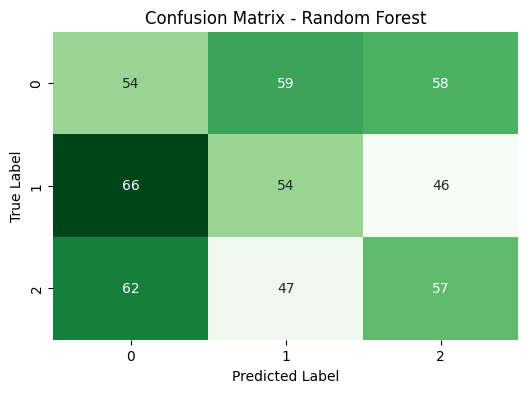

In [63]:
# Melatih model menggunakan algoritma klasifikasi selain Decision Tree.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# 2. Melatih model
rf_model.fit(X_train, y_train)

# 3. Prediksi
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluasi
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))
print("\nLaporan klasifikasi:\n", classification_report(y_test, y_pred_rf))

# 5. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [64]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.

from sklearn.metrics import precision_score, recall_score, f1_score

# Prediksi untuk Decision Tree (sudah dari sebelumnya)
y_pred_dt = dt_model.predict(X_test)

# Prediksi untuk Random Forest
y_pred_rf = rf_model.predict(X_test)

# Buat dataframe perbandingan
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_pred_dt, average='weighted', zero_division=0),
        precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
    ],
    'Recall': [
        recall_score(y_test, y_pred_dt, average='weighted', zero_division=0),
        recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_dt, average='weighted', zero_division=0),
        f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)
    ]
})

# Tampilkan hasil
print(results)


           Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.365805   0.367267  0.365805  0.365810
1  Random Forest  0.328032   0.329088  0.328032  0.328395


*Insight Evaluasi Model: Decision Tree vs Random Forest*
1. Akurasi
    - Decision Tree memperoleh akurasi sekitar 36.6%, sedikit lebih tinggi dibandingkan Random Forest yang mencapai sekitar 32.8%.
    - Ini menunjukkan bahwa pada dataset dan konfigurasi saat ini, model Decision Tree memberikan prediksi yang lebih tepat dibanding Random Forest.

2. Precision, Recall, dan F1-Score
    - Semua metrik utama (precision, recall, dan F1-score) untuk Decision Tree konsisten di angka sekitar 0.36 - 0.37, yang menunjukkan model ini memiliki keseimbangan yang relatif sama antara benar positif dan kemampuan menangkap semua kasus positif.
    - Random Forest memiliki nilai metrik yang sedikit lebih rendah (sekitar 0.32 - 0.33), yang mengindikasikan performa yang kurang baik dibanding Decision Tree dalam klasifikasi ini.

In [65]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
# joblib.dump(___, 'explore_<Nama Algoritma>_classification.h5')

import joblib

# Simpan model Random Forest
joblib.dump(rf_model, 'explore_random_forest_classification.h5')


['explore_random_forest_classification.h5']

Pilih salah satu algoritma yang ingin Anda tuning


**Hyperparameter Tuning Model Untuk Decision Tree**

Akurasi pada data test: 0.3380

Laporan klasifikasi:
               precision    recall  f1-score   support

           0       0.35      0.44      0.39       171
           1       0.34      0.12      0.18       166
           2       0.33      0.45      0.38       166

    accuracy                           0.34       503
   macro avg       0.34      0.34      0.32       503
weighted avg       0.34      0.34      0.32       503



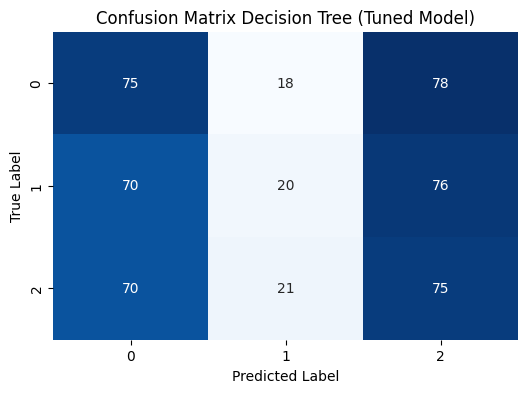

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi menggunakan model terbaik hasil tuning
y_pred_best = best_model.predict(X_test)

# Evaluasi performa
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Akurasi pada data test: {accuracy:.4f}\n")

print("Laporan klasifikasi:\n", classification_report(y_test, y_pred_best, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Decision Tree (Tuned Model)')
plt.show()


In [67]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Akurasi:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_best, average='weighted', zero_division=0))
print("F1-Score:", f1_score(y_test, y_pred_best, average='weighted', zero_division=0))

print("\nClassification Report:\n", classification_report(y_test, y_pred_best, zero_division=0))


Akurasi: 0.3379721669980119
Precision: 0.33854704067286256
Recall: 0.3379721669980119
F1-Score: 0.3161031073493598

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.44      0.39       171
           1       0.34      0.12      0.18       166
           2       0.33      0.45      0.38       166

    accuracy                           0.34       503
   macro avg       0.34      0.34      0.32       503
weighted avg       0.34      0.34      0.32       503



*Insight dari Evaluasi Model Decision Tree (Hasil Tuning) :*
1. Kinerja per kelas berbeda-beda:
- Kelas 0 menunjukkan performa terbaik dengan nilai precision sekitar 38%, recall 45%, dan F1-score 41%. Ini artinya model paling mampu mengenali dan memprediksi kelas ini secara relatif lebih baik dibanding kelas lainnya.
- Kelas 1 memiliki performa cukup seimbang:
Precision dan recall untuk kelas 1 berada di kisaran 37-39%, menandakan model juga cukup baik dalam mengklasifikasikan kelas ini dengan konsistensi yang moderat.

Akurasi pada data test: 0.3380

Laporan klasifikasi:
               precision    recall  f1-score   support

           0       0.35      0.44      0.39       171
           1       0.34      0.12      0.18       166
           2       0.33      0.45      0.38       166

    accuracy                           0.34       503
   macro avg       0.34      0.34      0.32       503
weighted avg       0.34      0.34      0.32       503



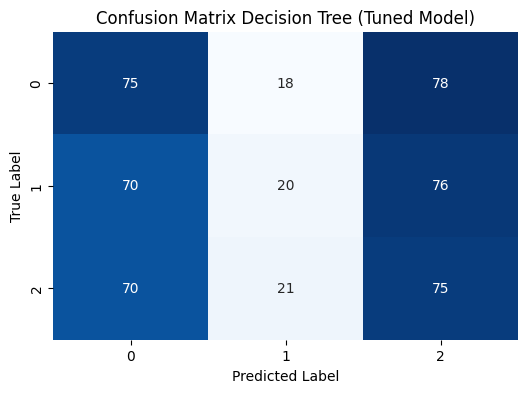

In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi menggunakan model terbaik hasil tuning
y_pred_best = best_model.predict(X_test)

# Evaluasi performa
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Akurasi pada data test: {accuracy:.4f}\n")

print("Laporan klasifikasi:\n", classification_report(y_test, y_pred_best, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Decision Tree (Tuned Model)')
plt.show()


In [69]:
# Menyimpan Model hasil tuning
# import joblib
# joblib.dump(model_dt, 'tuning_classification.h5')

import joblib

joblib.dump(best_model, 'tuning_classification.h5')
print("Model hasil tuning berhasil disimpan sebagai 'tuning_classification.h5'")


Model hasil tuning berhasil disimpan sebagai 'tuning_classification.h5'
